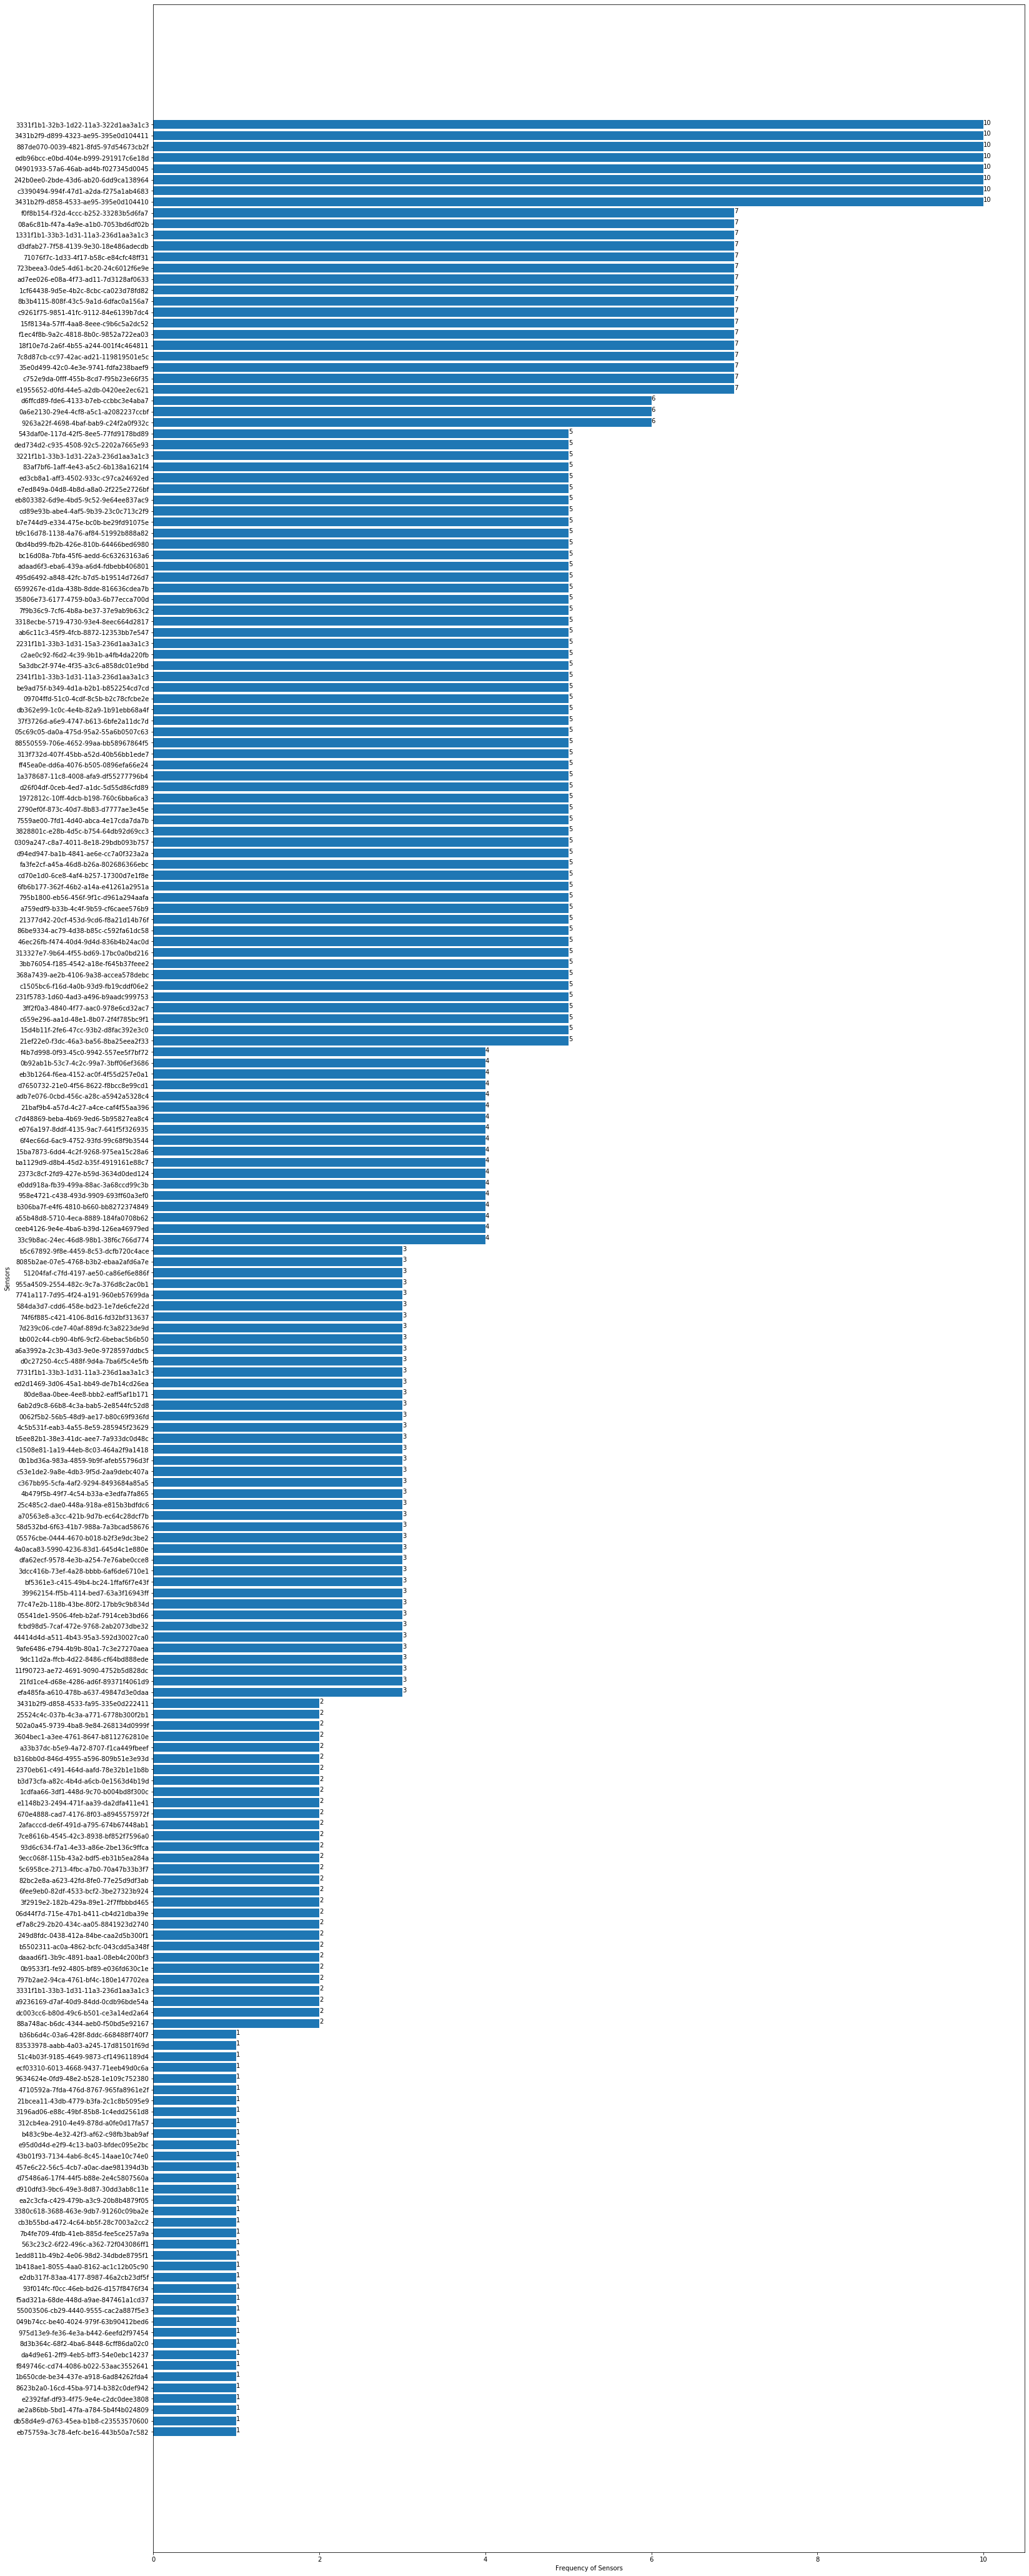

In [1]:
import os
import re
import json 
import matplotlib.pyplot as plt
import pandas as pd

questionMap = {} 
count = 0

# Good Actors Dataset
path = ('/data/datasets/CRA/good_actors_Mar6_2022')
for root, dirs, files in os.walk(path, topdown=False):
   for filename in files:
      if filename[-4:] == 'json':
        #Read json-metadata contents
        try:
          f = open("".join([root,"/",filename]),"r")
          data = json.load(f)
        except:
          print("An error occured while opening the file")
          break

      #Checking Sensor type
        #Iphone
        if data['type'] == 'i-kry-sensor-survey-daily':
          try: #Opening the real survey data contents
            main_file = filename.replace("-metadata.json","")  
            f = open("".join([root,"/", main_file]),"r")
            main_data = json.load(f)
            for key in main_data['i-kry-sensor-survey-daily']:
              question = key['questionUUID']
              if question not in questionMap:
                questionMap[question] = 0
              questionMap[question] += 1
          except:
            print('ERROR could not find file: ' + main_file)
        #Andorid
        if data['type'] == 'a-kry-sensor-survey-daily':
          try: #Opening the real survey data contents
            main_file = filename.replace("-metadata.json","")  
            f = open("".join([root,"/", main_file]),"r")
            main_data = json.load(f)
            for key in main_data['a-kry-sensor-survey-daily']:
              question = key['questionUUID']
              if question not in questionMap:
                questionMap[question] = 0
              questionMap[question] += 1
          except:
            print('ERROR could not find file: ' + main_file)
        f.close()

#Bad Actors Dataset
path = ('/data/datasets/CRA/bad_actors_Mar6_2022')
for root, dirs, files in os.walk(path, topdown=False):
   for filename in files:
      if filename[-4:] == 'json':
        #Read json-metadata contents
        try:
          f = open("".join([root,"/",filename]),"r")
          data = json.load(f)
        except:
          print("An error occured while opening the file")
          break
      #Checking Sensor type
        #Iphone
        if data['type'] == 'i-kry-sensor-survey-daily':
          try: #Opening the real survey data contents
            main_file = filename.replace("-metadata.json","")  
            f = open("".join([root,"/", main_file]),"r")
            main_data = json.load(f)
            for key in main_data['i-kry-sensor-survey-daily']:
              question = key['questionUUID']
              if question not in questionMap:
                questionMap[question] = 0
              questionMap[question] += 1
          except:
            print('ERROR could not find file: ' + main_file)
        #Andorid
        if data['type'] == 'a-kry-sensor-survey-daily':
          try: #Opening the real survey data contents
            main_file = filename.replace("-metadata.json","")  
            f = open("".join([root,"/", main_file]),"r")
            main_data = json.load(f)
            for key in main_data['a-kry-sensor-survey-daily']:
              question = key['questionUUID']
              if question not in questionMap:
                questionMap[question] = 0
              questionMap[question] += 1
          except:
            print('ERROR could not find file: ' + main_file)
        f.close()

#Read UUIDSs from Excel and extracting real question



# Questions PLOT
df = pd.DataFrame({'Type':list(questionMap.keys()),'Freq':list(questionMap.values())})
df_sorted = df.sort_values('Freq',ascending = True)
plt.figure(figsize=(25,75))
for key in questionMap:
    plt.annotate(str(questionMap[key]), (questionMap[key],key))
plt.barh('Type','Freq', data = df_sorted)
plt.xlabel("Frequency of Sensors")
plt.ylabel("Sensors")
plt.show()
